In [ ]:
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from datetime import datetime
import matplotlib.dates as mdates
from numpy.lib.function_base import median

# SQL para criar o CSV, fica no servidor de banco de dados que está rodando no openstack da serra, no IP 10.50.1.122
# SELECT  `tests`.`id_tests`,
# 		`tests`.`description`,
# 		`tests_methods`.`id_tests_methods`,
# 		`tests_methods`.`id_methods`,
#         `computenodedata`.`id_compute_node_data`,
# 		`tests_methods`.`start_date_test_methods`,
# 		`tests_methods`.`finish_date_test_methods`,
#         `computenodedata`.`compute_node_data_date`,
#         `computenodedata`.`compute_node_data_cpu_percent`,
#         `computenodedata`.`compute_node_data_memory_percent`
# FROM `tests`, `tests_methods`, `computenodedata`
# WHERE (`tests`.`id_tests` = `tests_methods`.`id_tests`) AND (`computenodedata`.`compute_node_data_date` BETWEEN `tests_methods`.`start_date_test_methods` AND `tests_methods`.`finish_date_test_methods`)
# ORDER BY `tests_methods`.`id_tests_methods` ASC


#methods 
# 1 criar_usuario
# 2 criar_projeto
# 3 configurar_rede
# 4 alocar_recursos
# 5 liberar_recursos
# 6 consumo_cpu
# 7 consumo_memoria


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!rm -rf TESTE
!git clone https://github.com/blindrabbit/TESTE.git

Cloning into 'TESTE'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 368 (delta 6), reused 0 (delta 0), pack-reused 353
Receiving objects: 100% (368/368), 884.36 KiB | 8.42 MiB/s, done.
Resolving deltas: 100% (264/264), done.


In [ ]:
df = pd.read_csv('/content/TESTE/tests.csv')
cenarios_list = df['description'].drop_duplicates(keep='first', inplace=False).tolist()
methods_list = df['id_methods'].drop_duplicates(keep='first', inplace=False).tolist()
df['timespend'] = (pd.to_datetime(df['finish_date_test_methods']) - pd.to_datetime(df['start_date_test_methods'])).dt.seconds
# cenarios_list = df2.drop_duplicates(keep='first', inplace=False).tolist()
df['id_tests_methods'].drop_duplicates(keep='first', inplace=False)
df = df.drop_duplicates(['id_tests_methods'], keep='first')
df_grouped = df.groupby(['description','id_methods']).agg({'timespend': ['mean', 'min', 'max']})
df_grouped.columns = ['timespend_mean', 'timespend_min', 'timespend_max']
df_grouped = df_grouped.reset_index()

cenarios_list

['1VM-0VNF', '1VM-1VNF', '1VM-2VNF', '1VM-3VNF', '1VM-4VNF', '1VM-5VNF']

In [ ]:
criarProjeto = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 2].tolist()
configurarRede = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 3].tolist()
alocarRecurso = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 4].tolist()
liberarRecurso = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 5].tolist()
criarProjetoYerrs = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 2].std(axis=0)
configurarRedeYerrs = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 3].std(axis=0)
alocarRecursoYerrs = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 4].std(axis=0)
liberarRecursoYerrs = df_grouped['timespend_mean'].loc[df_grouped['id_methods'] == 5].std(axis=0)

<Figure size 720x360 with 0 Axes>

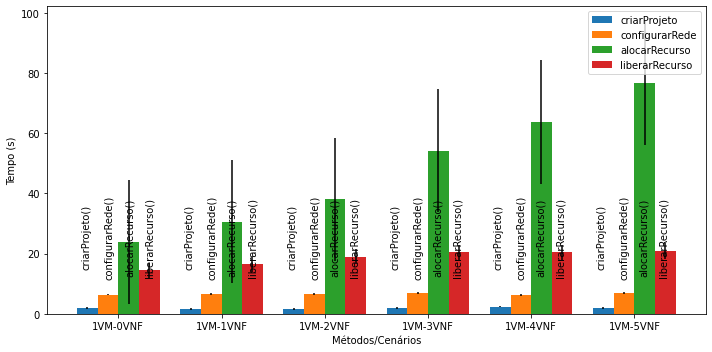

[0.2, 1.2, 2.2, 3.2, 4.2, 5.2]

In [ ]:
fig = plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
# set width of bars
barWidth = 0.20
# Set position of bar on X axis
r1 = np.arange(len(criarProjeto))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
bar1 = ax.bar(r1, criarProjeto, width=barWidth, label='criarProjeto', yerr=(criarProjetoYerrs))
ax.bar(r2, configurarRede, width=barWidth, label='configurarRede', yerr=configurarRedeYerrs)
ax.bar(r3, alocarRecurso, width=barWidth, label='alocarRecurso', yerr=(alocarRecursoYerrs))
ax.bar(r4, liberarRecurso, width=barWidth, label='liberarRecurso', yerr=liberarRecursoYerrs)

for i in range(len(criarProjeto)):
  ax.text(0.060+i/6.4, 0.25, 'criarProjeto()', horizontalalignment='center', verticalalignment='center', rotation='vertical', transform=ax.transAxes, fontsize=10)

for i in range(len(configurarRede)):
  ax.text(0.095+i/6.4, 0.25, 'configurarRede()', horizontalalignment='center', verticalalignment='center', rotation='vertical', transform=ax.transAxes, fontsize=10)

for i in range(len(configurarRede)):
  ax.text(0.125+i/6.4, 0.25, 'alocarRecurso()', horizontalalignment='center', verticalalignment='center', rotation='vertical', transform=ax.transAxes, fontsize=10)

for i in range(len(configurarRede)):
  ax.text(0.155+i/6.4, 0.25, 'liberarRecurso()', horizontalalignment='center', verticalalignment='center', rotation='vertical', transform=ax.transAxes, fontsize=10)

# Add xticks on the middle of the group bars
plt.xlabel('Métodos/Cenários')
plt.ylabel('Tempo (s)')
# plt.xticks([r + barWidth for r in range(len(criarProjeto))], ['A', 'B', 'C', 'D', 'E'])
plt.xticks([r + barWidth+barWidth/2 for r in range(len(criarProjeto))],  cenarios_list)

# plt.rcParams["figure.autolayout"] = True

fig.tight_layout()
# Create legend & Show graphic
plt.legend()
plt.show()
r2

In [ ]:
# Graficos do consumo de CPU e MEMORIA NOS CASOS

df = pd.read_csv('/content/TESTE/tests.csv')
cenarios_list = df['description'].drop_duplicates(keep='first', inplace=False).tolist()
methods_list = df['id_methods'].drop_duplicates(keep='first', inplace=False).tolist()
df['timespend'] = (pd.to_datetime(df['finish_date_test_methods']) - pd.to_datetime(df['start_date_test_methods'])).dt.seconds
# cenarios_list = df2.drop_duplicates(keep='first', inplace=False).tolist()
#df['id_tests_methods'].drop_duplicates(keep='first', inplace=False)
df = df.drop_duplicates(['compute_node_data_date'], keep='first')
# df_grouped = df.groupby(['description','id_methods']).agg({'timespend': ['mean', 'min', 'max']})
# df_grouped.columns = ['timespend_mean', 'timespend_min', 'timespend_max']
# df_grouped = df_grouped.reset_index()

cenarios_list

['1VM-0VNF', '1VM-1VNF', '1VM-2VNF', '1VM-3VNF', '1VM-4VNF', '1VM-5VNF']

<Figure size 576x360 with 0 Axes>

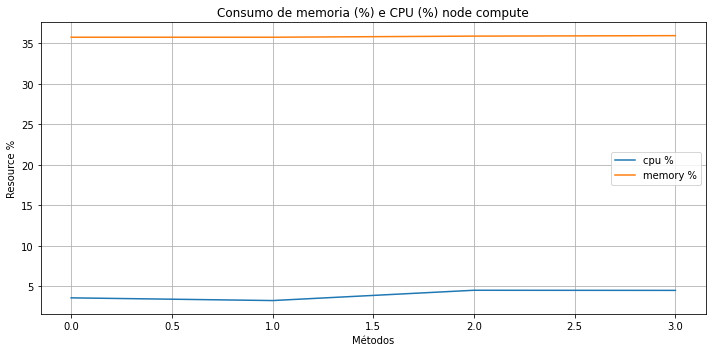

In [ ]:
criarProjeto = df.loc[(df['id_methods'] == 2) & (df['description']== '1VM-0VNF')]
df_grouped_cpu = df.groupby(['description', 'id_methods']).agg({'compute_node_data_cpu_percent': ['mean', 'min', 'max'], 'compute_node_data_date': 'first', 'timespend': 'first'})
df_grouped_cpu.columns = ['cpu_mean', 'cpu_min', 'cpu_max', 'execution_time', 'timespend']
df_grouped_cpu = df_grouped_cpu.reset_index()

df_grouped_memory = df.groupby(['description', 'id_methods']).agg({'compute_node_data_memory_percent': ['mean', 'min', 'max'], 'compute_node_data_date': 'first', 'timespend': 'first'})
df_grouped_memory.columns = ['memory_mean', 'memory_min', 'memory_max', 'execution_time', 'timespend']
df_grouped_memory = df_grouped_memory.reset_index()

tc = df_grouped_cpu['cpu_mean'].loc[df_grouped_cpu['description']== '1VM-0VNF'].to_list()
tm = df_grouped_memory['memory_mean'].loc[df_grouped_memory['description']== '1VM-0VNF'].to_list()

s = np.arange(0.0, len(tc), 1)


fig = plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
ax.plot(s,tc, label='cpu %')
ax.plot(s,tm, label='memory %')

ax.set(xlabel='Métodos', ylabel='Resource %',
       title='Consumo de memoria (%) e CPU (%) node compute')
ax.grid()

plt.legend()
plt.show()

1VM-0VNF
1VM-1VNF
1VM-2VNF
1VM-3VNF
1VM-4VNF
1VM-5VNF


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

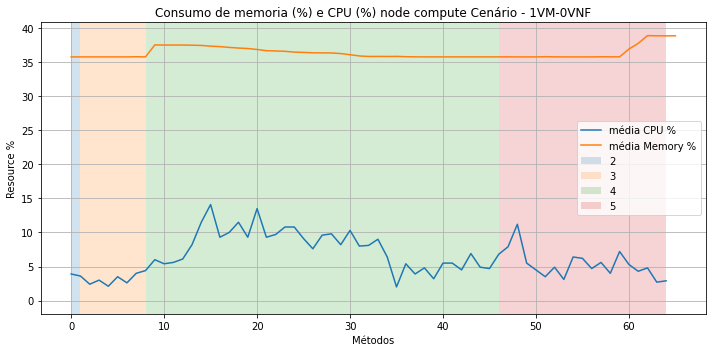

In [ ]:
for cenario in cenarios_list:
  print(cenario)

df = df.loc[(df['description'] == '1VM-2VNF')]
df_methods = df.groupby(['id_methods']).agg({'timespend': ['mean', 'min', 'max']})
df_methods.columns = ['timespend_mean', 'timespend_min', 'timespend_max']
methods_list = df['id_tests'].drop_duplicates(keep='first', inplace=False).tolist()
dfs=[]
for i in methods_list:
  dfs.append(df.loc[(df['id_tests'] == i)])

cpu = []
for i in range(len(dfs)):
  cpu.append(list(dfs[i]['compute_node_data_cpu_percent']))

memory = []
for i in range(len(dfs)):
  memory.append(list(dfs[i]['compute_node_data_memory_percent']))

# # compute_node_data_cpu_percent	
# # compute_node_data_memory_percent

fig = plt.figure(figsize=(80,150))
fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()

cpu_median = np.median(cpu, axis=0)
memory_median = np.median(memory, axis=0)

ax.plot(np.arange(0.0, len(cpu_median), 1), cpu_median, label='média CPU %')
ax.plot(np.arange(0.0, len(memory_median), 1), memory_median, label='média Memory %')

x = np.arange(0.0, len(cpu_median))
start = -1
for index, method in df_methods.iterrows():
  end = start+method['timespend_mean']
  ax.fill_between(x, 0, 2, where=(start < x)&(x <= end+1), alpha=.20, transform=ax.get_xaxis_transform(),label=index)
  start = end

ax.set(xlabel='Métodos', ylabel='Resource %',
       title='Consumo de memoria (%) e CPU (%) node compute Cenário - 1VM-0VNF')
       

ax.grid()
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

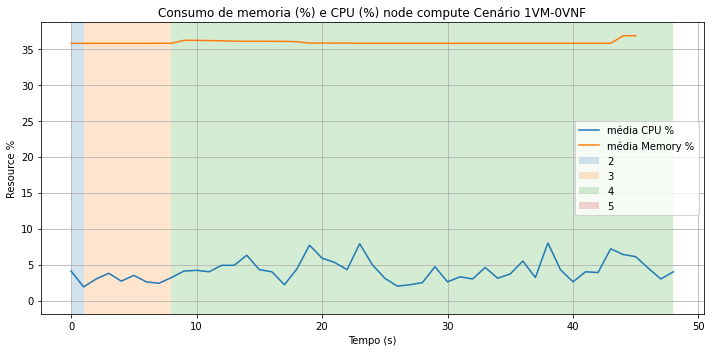

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

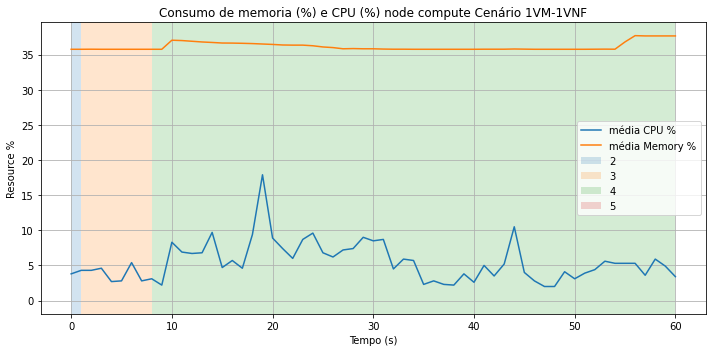

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

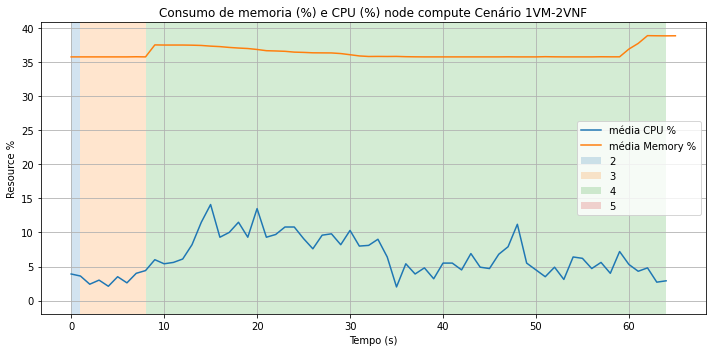

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

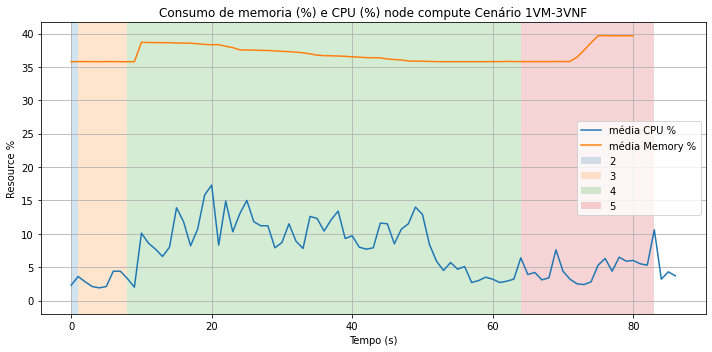

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

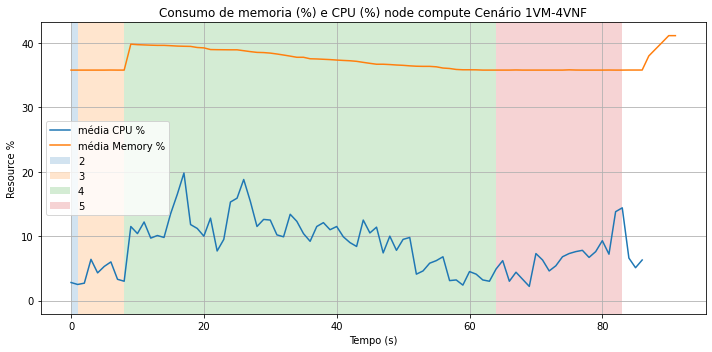

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


<Figure size 1332x756 with 0 Axes>

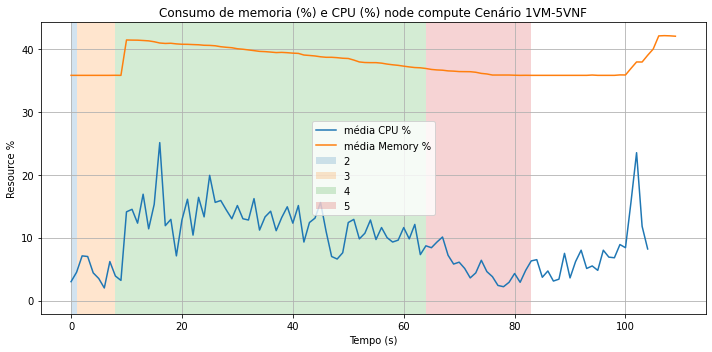

In [ ]:
# Graficos do consumo de CPU e MEMORIA NOS CASOS
df = pd.read_csv('/content/TESTE/tests.csv')
cenarios_list = df['description'].drop_duplicates(keep='first', inplace=False).tolist()
methods_list = df['id_methods'].drop_duplicates(keep='first', inplace=False).tolist()
df['timespend'] = (pd.to_datetime(df['finish_date_test_methods']) - pd.to_datetime(df['start_date_test_methods'])).dt.seconds
df = df.drop_duplicates(['compute_node_data_date'], keep='first')

for cenario in cenarios_list:
  df_cenario = df.loc[(df['description'] == cenario)]
  df_methods = df.groupby(['id_methods']).agg({'timespend': ['mean', 'min', 'max']})
  df_methods.columns = ['timespend_mean', 'timespend_min', 'timespend_max']

  methods_list = df_cenario['id_tests'].drop_duplicates(keep='first', inplace=False).tolist()
  dfs=[]

  for i in methods_list:
    dfs.append(df_cenario.loc[(df_cenario['id_tests'] == i)])

  cpu = []
  for i in range(len(dfs)):
    cpu.append(list(dfs[i]['compute_node_data_cpu_percent']))

  memory = []
  for i in range(len(dfs)):
    memory.append(list(dfs[i]['compute_node_data_memory_percent']))

  fig = plt.figure(figsize=(80,150))
  fig.set_size_inches(18.5, 10.5)
  plt.rcParams["figure.figsize"] = (10,5)
  fig, ax = plt.subplots()

  cpu_median = np.median(cpu, axis=0)

  memory_median = np.median(memory, axis=0)

  ax.plot(np.arange(0.0, len(cpu_median), 1), cpu_median, label='média CPU %')
  ax.plot(np.arange(0.0, len(memory_median), 1), memory_median, label='média Memory %')

  x = np.arange(0.0, len(cpu_median))
  start = -1
  for index, method in df_methods.iterrows():
    end = start+method['timespend_mean']
    ax.fill_between(x, 0, 2, where=(start < x)&(x <= end+1), alpha=.20, transform=ax.get_xaxis_transform(),label=index)
    start = end

  ax.set(xlabel='Tempo (s)', ylabel='Resource %',
        title='Consumo de memoria (%) e CPU (%) node compute Cenário '+ cenario)
        

  ax.grid()
  plt.legend()
  plt.show()


<Figure size 576x10800 with 0 Axes>

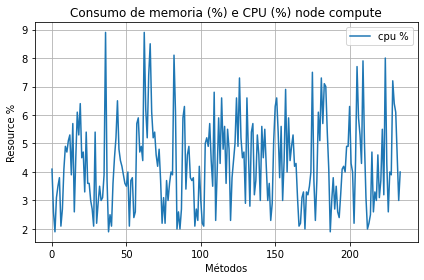

In [ ]:
df = df.loc[(df['description'] == '1VM-0VNF')]
# df_grouped = df.groupby(['description']).agg({'compute_node_data_cpu_percent': ['mean', 'min', 'max'], 'compute_node_data_date': 'first', 'timespend': 'first'})
# df_grouped.columns = ['mean', 'min', 'max', 'execution_time', 'timespend']
df_grouped = df.reset_index()

cpu = list(df_grouped['compute_node_data_cpu_percent'])

fig = plt.figure(figsize=(8,150))
fig, ax = plt.subplots()

s = np.arange(0.0, len(cpu), 1)
ax.plot(s,cpu, label='cpu %')
# ax.plot(len(cpu),tm, label='memory %')

ax.set(xlabel='Métodos', ylabel='Resource %',
       title='Consumo de memoria (%) e CPU (%) node compute')
ax.grid()

plt.legend()
plt.show()
# cpu = df_grouped['compute_node_data_cpu_percent'].loc[(df_grouped['description'] == '1VM-0VNF')].to_list()